In [1]:
import numpy as np
import pandas as pd
import yfinance as yf
import datetime as dt
import matplotlib.pyplot as plt
import mplfinance as mpf
import math
from finta import TA as ta
from pandas import read_csv
from pandas import to_datetime
from pandas import DataFrame
from prophet import Prophet
from matplotlib import pyplot

In [2]:
start = '2020-10-01'       # Begin date for downloading stock data format: YYYY-MM-DD         
end = dt.datetime.now()    # today

In [3]:
# Create a list with all the stocks that trade in DOW 
stocks_list=['AAPL','CAT','KO','MRK','AXP','JNJ','MMM','IBM',
             'MSFT','CVX','CSCO','WMT','INTC','UNH','WBA','DOW',
             'NKE','BA','AMGN','CRM','PG','V'',VZ','DIS','HD','HON','TRV','MCD','JPM','GS']

In [4]:
stock_df = {}
stock_symbol='AAPL'

In [5]:
 df = yf.download(stock_symbol,start, end, interval='1d')

[*********************100%***********************]  1 of 1 completed


In [6]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-10-01,117.639999,117.720001,115.830002,116.790001,115.557289,116120400
2020-10-02,112.889999,115.370003,112.220001,113.019997,111.827072,144712000
2020-10-05,113.910004,116.650002,113.550003,116.500000,115.270348,106243800
2020-10-06,115.699997,116.120003,112.250000,113.160004,111.965607,161498200
2020-10-07,114.620003,115.550003,114.129997,115.080002,113.865341,96849000


In [7]:
df = yf.download(stock_symbol,start, end, interval='1d')
df.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-10-01,117.639999,117.720001,115.830002,116.790001,115.557281,116120400
2020-10-02,112.889999,115.370003,112.220001,113.019997,111.827065,144712000
2020-10-05,113.910004,116.650002,113.550003,116.500000,115.270355,106243800
2020-10-06,115.699997,116.120003,112.250000,113.160004,111.965599,161498200
2020-10-07,114.620003,115.550003,114.129997,115.080002,113.865334,96849000


In [8]:
# get data from finta for 
df=df.join(pd.DataFrame(ta.RSI(df),columns=None), how='outer')

In [9]:
df=df.rename(columns={"14 period RSI":"RSI_14_Day"})

In [10]:
df.head()

,Open,High,Low,Close,Adj Close,Volume,RSI_14_Day
Date,,,,,,,
2020-10-01,117.639999,117.720001,115.830002,116.790001,115.557281,116120400,NaN
2020-10-02,112.889999,115.370003,112.220001,113.019997,111.827065,144712000,0.000000
2020-10-05,113.910004,116.650002,113.550003,116.500000,115.270355,106243800,49.851628
2020-10-06,115.699997,116.120003,112.250000,113.160004,111.965599,161498200,32.899618
2020-10-07,114.620003,115.550003,114.129997,115.080002,113.865334,96849000,44.568694


In [11]:
short_sma= 20
long_sma = 50
SMAs=[short_sma, long_sma]

In [12]:
for i in SMAs:
    df["SMA_"+str(i)]= df.iloc[:,4].rolling(window=i).mean()

In [13]:
df.sample()

,Open,High,Low,Close,Adj Close,Volume,RSI_14_Day,SMA_20,SMA_50
Date,,,,,,,,,
2021-07-20,143.460007,147.100006,142.960007,146.149994,145.319748,96350000,64.349791,140.059807,131.672922


In [14]:
# Adding volume moving average column
Volume_MA = 10
#for i in Volume_MA:
df["Vol_Avg"]= df.iloc[:,5].rolling(window=Volume_MA).mean()

In [15]:
# Adding Moving average indicator
Volume_MAI = 0
#for i in Volume_MA:
df["Vol_Avg_Ind"]= df.iloc[:,5]/df.iloc[:,8].round(-2) #.rolling(window=Volume_MA).mean()

In [16]:
df.tail(50)

,Open,High,Low,Close,Adj Close,Volume,RSI_14_Day,SMA_20,SMA_50,Vol_Avg,Vol_Avg_Ind
Date,,,,,,,,,,,
2022-03-11,158.929993,159.279999,154.500000,154.729996,154.502991,96970100,36.235259,164.170792,168.281323,94000550.0,484850.5
2022-03-14,151.449997,154.119995,150.100006,150.619995,150.399017,108732100,32.534970,163.271114,167.735060,95368100.0,543660.5
2022-03-15,150.899994,155.570007,150.380005,155.089996,154.862457,92964300,39.742195,162.582625,167.290632,96317090.0,464821.5
2022-03-16,157.050003,160.000000,154.460007,159.589996,159.355865,102300200,45.996781,161.923593,166.847515,98574630.0,511501.0
2022-03-17,158.610001,161.000000,157.630005,160.619995,160.384354,75615400,47.344011,161.327968,166.471041,98468330.0,378077.0
2022-03-18,160.509995,164.479996,159.759995,163.979996,163.739426,123511700,51.586997,161.083327,166.257007,102445780.0,617558.5
2022-03-21,163.509995,166.350006,163.009995,165.380005,165.137375,95811400,53.276412,160.987469,166.129172,102385040.0,479057.0
2022-03-22,165.509995,169.419998,164.910004,168.820007,168.572327,81532000,57.226123,161.212138,166.066646,97423410.0,407660.0
2022-03-23,167.990005,172.639999,167.649994,170.210007,169.960297,98062700,58.743731,161.718394,166.031480,98084190.0,490313.5


In [17]:
#Export to csv
df.to_csv('Resources/AAPL.csv')

# Start Prophet with regressor

In [28]:
fit_df = pd.DataFrame()
fit_df[['Close', 'Vol_Avg_Ind','RSI_14_Day']] = df[['Close', 'Vol_Avg_Ind','RSI_14_Day']]
fit_df = fit_df[['Close', 'Vol_Avg_Ind','RSI_14_Day']].dropna()

fit_df.index = pd.to_datetime(fit_df.index)
fit_df.reset_index(inplace=True)
#fit_df.index.names = ['ds']
fit_df.columns = ['ds','y', 'Vol_Avg_Ind','RSI_14_Day']

fit_df.tail(5)

,ds,y,Vol_Avg_Ind,RSI_14_Day
359,2022-05-16,145.539993,433219.0,36.688188
360,2022-05-17,149.240005,391681.5,41.366365
361,2022-05-18,140.820007,548714.5,35.024001
362,2022-05-19,137.350006,680478.0,32.792580
363,2022-05-20,137.589996,685973.0,33.109993


In [29]:
#keep only 2021 data
fit_df=fit_df[(fit_df['ds']>'2020-12-31')]
fit_df=fit_df[(fit_df['ds']<'2022-01-01')]
fit_df.tail(5)

,ds,y,Vol_Avg_Ind,RSI_14_Day
262,2021-12-27,180.330002,374598.0,66.890408
263,2021-12-28,179.289993,395721.5,64.950263
264,2021-12-29,179.380005,311744.5,65.044762
265,2021-12-30,178.199997,298865.0,62.659680
266,2021-12-31,177.570007,320311.5,61.365927


In [30]:
# df - create future days - 10 business days
future_range = pd.bdate_range('2022-01-01', periods=10)
future_ind_df = pd.DataFrame({ 'future_date': future_range, 'future_ind' : 0, 'future_ind_2' : 0 })

future_ind_df['future_date'] = pd.to_datetime(future_ind_df['future_date'])
#future_df = future_df.set_index('future_date')

for i in future_ind_df['future_date']:
    future_ind_df['future_ind'] = fit_df.iloc[-1]['Vol_Avg_Ind']
    future_ind_df['future_ind_2'] = fit_df.iloc[-1]['RSI_14_Day']

future_ind_df

,future_date,future_ind,future_ind_2
0,2022-01-03,320311.5,61.365927
1,2022-01-04,320311.5,61.365927
2,2022-01-05,320311.5,61.365927
3,2022-01-06,320311.5,61.365927
4,2022-01-07,320311.5,61.365927
5,2022-01-10,320311.5,61.365927
6,2022-01-11,320311.5,61.365927
7,2022-01-12,320311.5,61.365927
8,2022-01-13,320311.5,61.365927
9,2022-01-14,320311.5,61.365927


In [21]:
# function to apply vol ind to future df
def avg_vol_generate(ds):
    date = (pd.to_datetime(ds)).date()
    
    if fit_df[date:].empty:
        return (fit_df['2021-12-31']['Vol_Avg_Ind']).values[0]
    else:
        return (fit_df[date:]['Vol_Avg_Ind']).values[0]
    
    return 0

In [22]:
m = Prophet()
m.add_regressor('Vol_Avg_Ind')
m.add_regressor('RSI_14_Day')
m.fit(fit_df)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [31]:
#future = m.make_future_dataframe(periods=10)
#future['Vol_Avg_Ind'] = future['ds'].apply(avg_vol_generate)

# create future df
future = pd.DataFrame()
# add data from fit
future = fit_df[['ds','Vol_Avg_Ind','RSI_14_Day']]

# create df that contains 10 days of future data
df_append = pd.DataFrame()
df_append[['ds','Vol_Avg_Ind','RSI_14_Day']] = future_ind_df
df_append['ds'] = pd.to_datetime(df_append['ds'])

# add 10 future days in 2013
future = future.append(df_append, ignore_index=True)
future.tail(12)

,ds,Vol_Avg_Ind,RSI_14_Day
250,2021-12-30,298865.0,62.659680
251,2021-12-31,320311.5,61.365927
252,2022-01-03,320311.5,61.365927
253,2022-01-04,320311.5,61.365927
254,2022-01-05,320311.5,61.365927
255,2022-01-06,320311.5,61.365927
256,2022-01-07,320311.5,61.365927
257,2022-01-10,320311.5,61.365927
258,2022-01-11,320311.5,61.365927
259,2022-01-12,320311.5,61.365927


In [32]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(15)

,ds,yhat,yhat_lower,yhat_upper
247,2021-12-27,177.018909,171.548169,182.267895
248,2021-12-28,177.732956,172.600323,182.990862
249,2021-12-29,178.240110,173.073808,182.849083
250,2021-12-30,178.798284,173.395852,183.778953
251,2021-12-31,179.207570,173.756669,184.495597
252,2022-01-03,180.284119,174.711106,185.518512
253,2022-01-04,181.034221,176.129751,186.181985
254,2022-01-05,181.398040,175.577222,186.095955
255,2022-01-06,181.934231,177.085343,187.023232
256,2022-01-07,182.380122,176.954297,187.851228


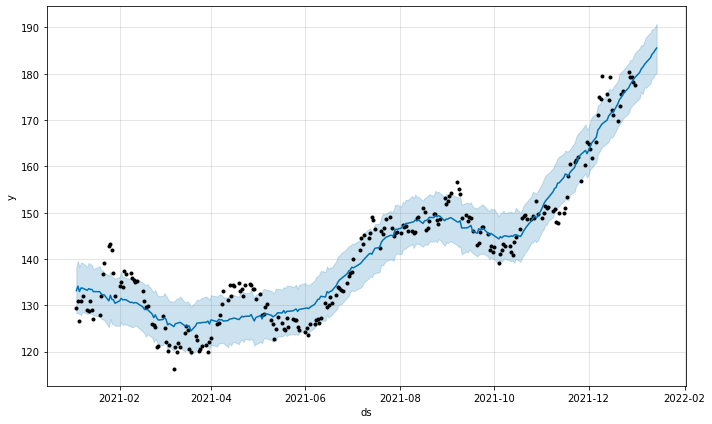

In [33]:
# plot forecast
m.plot(forecast)
pyplot.show()